In [1]:
# Load the matplotlig style file
include("mplstyle.jl");

In [2]:
function PlotFunction(f, df, x0, x1)
    # create a number of x-values for which the function should be evaluated
    x_plot = range(x0, x1, length = 100)
    # evaluate the function for each point and write it to an array
    f_plot = [f(x) for x = x_plot]
    # do the same for the derivativ
    df_plot = [df(x) for x = x_plot]
    
    # plot the function
    plot(x_plot,f_plot,color = "blue",label = "f(x)")
    # plot the derivative
    plot(x_plot,df_plot,color = "red",label = raw"$\frac{df}{dx}(x)$")
    
    # Get the axes
    ax = gca()
    
    ax.set_xlabel("x")

    # plot the legend
    ax.legend(loc = "upper left");
end

PlotFunction (generic function with 1 method)

# Exercise 1.1b

Verify the derivative of $f(x)$ by implementing the difference quotient.

The given function is:
\begin{equation}
f(x) = \mathrm{ln}(3x^3 + 2)\cdot x + 2 x^5 + 5 e^{-x^2} + \mathrm{sin}(2x)
\end{equation}

In [28]:
f(x) = log(3 * x^3 + 2) * x + 2 * x ^ 5 + 5 * exp(-x^2) + sin(2 * x)

f (generic function with 2 methods)

In [29]:
# ===============================================
# Implement the analytical derivative of f(x)
df(x) = 10 * x^4 + (9 * x^3)/(3*x^3 + 2) - 10*x * exp(-x^2) + log(3 * x^3 + 2)+ 2 *cos(2*x)
# ===============================================

df (generic function with 1 method)

In [30]:
PlotFunction(f,df, 0, 10)

PyObject <matplotlib.legend.Legend object at 0x0000022B9736F640>

The difference quotient of a function at the point $x$ is an approximation for the functions derivative $df/dx$:
\begin{equation}
\frac{df}{dx}(x) \approx \frac{f(x+h)-f(x)}{h},
\end{equation}
for $h\rightarrow 0$. See lecture 1, slide 16.

In [31]:
function df_approx(f,x,h)
    # ===============================================
    # Return the difference quotient
    return (f(x + h) - f(x))/h
    # ===============================================
end

df_approx (generic function with 1 method)

In [32]:
# some arbitrary value at which the derivative of the function should be tested
# try others as well!
x0 = 10

# some small value
h = 0.00000001;

In [33]:
# Test your result
@assert abs(df_approx(f,x0,h) - df(x0)) < 0.1

# Exercise 1.2c

 Let $g$ be a function depending on the variables $x_1$ and $x_2$:
\begin{equation}
g(x_1,x_2) =  6 x_1^3 + \mathrm{sin}(2x_2)
\end{equation}

In [34]:
g(x1,x2) = 6*x1^3 + sin(2*x2)

g (generic function with 1 method)

In [35]:
# The gradient of g(x)
dg(x1,x2) = [18*x1^2;
            2*cos(2*x2)]

dg (generic function with 1 method)

In [36]:
# The hessian of g(x)
H(x1,x2) = [36*x1  0;
            0  -4*sin(2x2)]

H (generic function with 1 method)

In [37]:
# test the derivative dg/dx1
# fix the value for x2 -> has no influence on the test
x_fix = 4
g_test(x) = g(x,x_fix)
@assert abs(df_approx(g_test,x0,h) - dg(x0,x_fix)[1])<0.1

In [38]:
# test the derivative dg/dx2
# fix the value for x1 -> has no influence on the test
x_fix = 10
g_test(x) = g(x_fix,x)
@assert abs(df_approx(g_test,x0,h) - dg(x_fix,x0)[2])<0.1

In [39]:
# Test the implementation of the Hessian: entry at row 1, column 1
# fix the value for x2 -> has no influence on the test
x_fix = 5
H_test(x) = H(x,x_fix)
dg_test(x) = dg(x,x_fix)[1]
@assert abs(df_approx(dg_test,x0,h) - H_test(x0)[1,1])<0.1

In [40]:
# Test the implementation of the Hessian: entry at row 1, column 2
# fix the value for x1 -> has no influence on the test
x_fix = 5
H_test(x) = H(x_fix,x)
dg_test(x) = dg(x_fix,x)[1]
@assert abs(df_approx(dg_test,x0,h) - H_test(x0)[1,2])<0.1

In [41]:
# Test the implementation of the Hessian: entry at row 2, column 1
# fix the value for x2 -> has no influence on the test
x_fix = 5
H_test(x) = H(x,x_fix)
dg_test(x) = dg(x,x_fix)[2]
@assert abs(df_approx(dg_test,x0,h) - H_test(x0)[2,1])<0.1

In [42]:
# Test the implementation of the Hessian: entry at row 2, column 2
# fix the value for x1 -> has no influence on the test
x_fix = 5
H_test(x) = H(x_fix,x)
dg_test(x) = dg(x_fix,x)[2]
@assert abs(df_approx(dg_test,x0,h) - H_test(x0)[2,2])<0.1

# Exercise 1.3

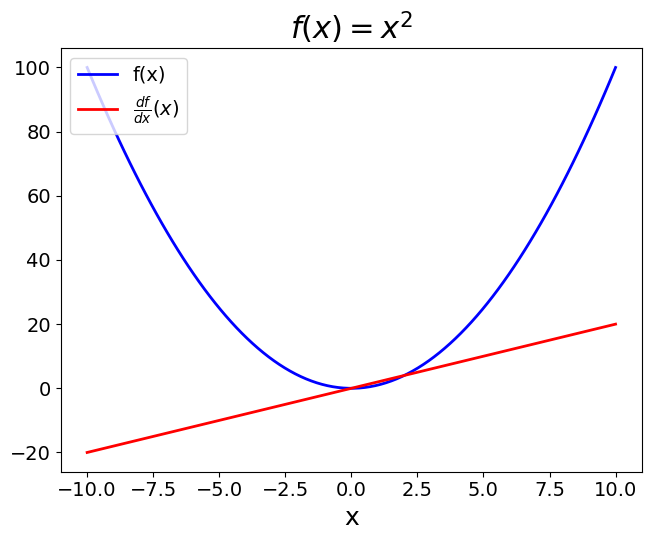

PyObject Text(0.5, 1.0, '$f(x) = x^2$')

In [18]:
f(x) = x^2
df(x) = 2x

PlotFunction(f,df, -10, 10)
title(raw"$f(x) = x^2$")

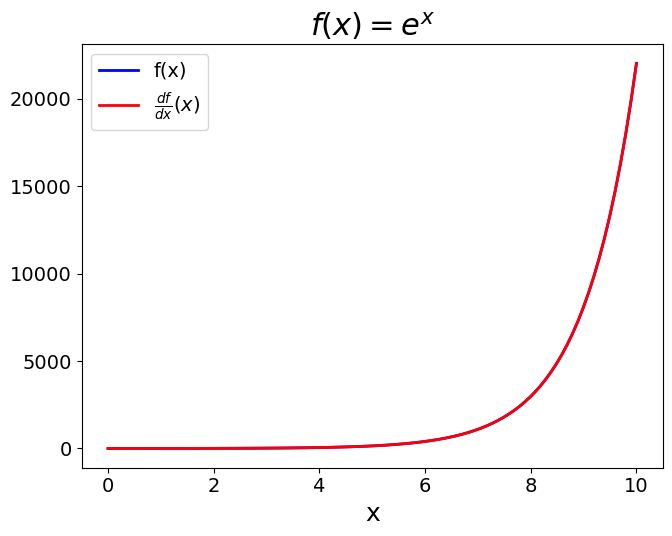

PyObject Text(0.5, 1.0, '$f(x) = e^{x}$')

In [19]:
a = 1
f(x) = exp(a*x)
df(x) = a*exp(a*x)

PlotFunction(f,df, 0, 10)
title(raw"$f(x) = e^{x}$")

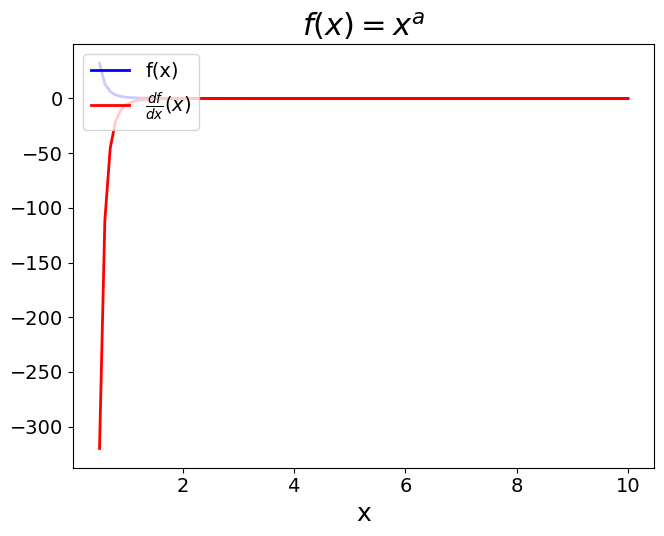

PyObject Text(0.5, 1.0, '$f(x) = x^a$')

In [20]:
a = -5
f(x) = x^a
df(x) = a*x^(a-1)

PlotFunction(f,df, 0.5, 10)
title(raw"$f(x) = x^a$")

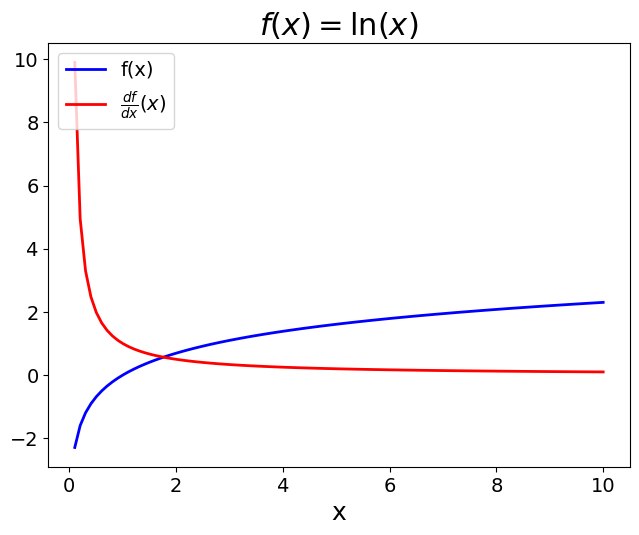

PyObject Text(0.5, 1.0, '$f(x) = \\ln(x)$')

In [21]:
f(x) = log(x)
df(x) = 1/x

PlotFunction(f,df, 0, 10)
title(raw"$f(x) = \ln(x)$")

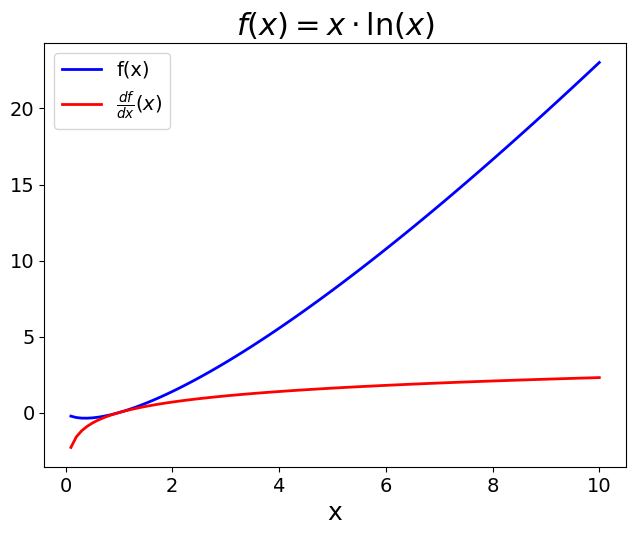

PyObject Text(0.5, 1.0, '$f(x) = x\\cdot\\ln(x)$')

In [22]:
f(x) = x * log(x)
df(x) = log(x)

PlotFunction(f,df, 0, 10)
title(raw"$f(x) = x\cdot\ln(x)$")

In [43]:
using Suppressor
#@suppress_err using PyPlot
@suppress_err PyPlot.using3D()

f(x1,x2) = max(x1,x2)

test_x1 = range(-10,10,length = 20)
test_x2 = range(-10,10,length = 20)

size_x1 = size(test_x1,1)
size_x2 = size(test_x2,1)
zs = [f(x1,x2) for x1 = test_x1, x2 = test_x2]

pygui(true);
fig = figure();
ax = fig.add_subplot(projection="3d")
ax[:plot_trisurf](repeat(test_x1, size_x2), reshape(repeat(test_x2', size_x1), size_x1*size_x2),
        reshape(zs, size_x1*size_x2),
        cmap=get_cmap("jet"), alpha=0.3)
xlabel("x1")
ylabel("x2")
zlabel("f(x)")

PyObject Text(0.10434036205060733, 0.01397895787471553, 'f(x)')

In [24]:
test_x1

-10.0:1.0526315789473684:10.0

In [25]:
zs

20×20 Matrix{Float64}:
 -10.0       -8.94737   -7.89474   …   6.84211   7.89474   8.94737  10.0
  -8.94737   -8.94737   -7.89474       6.84211   7.89474   8.94737  10.0
  -7.89474   -7.89474   -7.89474       6.84211   7.89474   8.94737  10.0
  -6.84211   -6.84211   -6.84211       6.84211   7.89474   8.94737  10.0
  -5.78947   -5.78947   -5.78947       6.84211   7.89474   8.94737  10.0
  -4.73684   -4.73684   -4.73684   …   6.84211   7.89474   8.94737  10.0
  -3.68421   -3.68421   -3.68421       6.84211   7.89474   8.94737  10.0
  -2.63158   -2.63158   -2.63158       6.84211   7.89474   8.94737  10.0
  -1.57895   -1.57895   -1.57895       6.84211   7.89474   8.94737  10.0
  -0.526316  -0.526316  -0.526316      6.84211   7.89474   8.94737  10.0
   0.526316   0.526316   0.526316  …   6.84211   7.89474   8.94737  10.0
   1.57895    1.57895    1.57895       6.84211   7.89474   8.94737  10.0
   2.63158    2.63158    2.63158       6.84211   7.89474   8.94737  10.0
   3.68421    3.68421    3.6